<a href="https://colab.research.google.com/github/satyhim/Assignments/blob/main/Hw_LOF_On_SuperStore_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Local Outlier Factor(LOF) : Anomaly Detection On Superstore Data

In [14]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/Python/Project/Superstore3.xlsx")

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [16]:
# Data processing
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

In [17]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**Sales Variable Analysis**

In [18]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

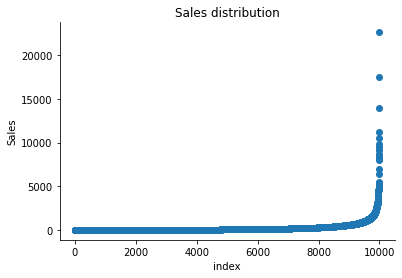

In [19]:
plt.scatter(range(df.shape[0]), np.sort(df['Sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("Sales distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


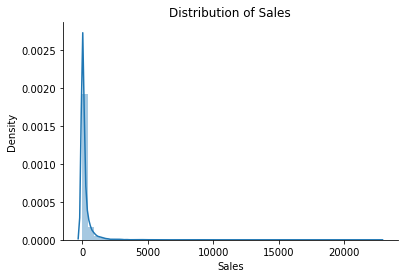

In [20]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

In [21]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


**Profit Variable Analysis**

In [22]:
df.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

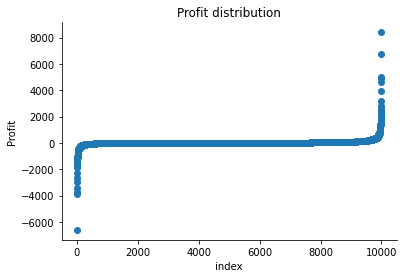

In [23]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


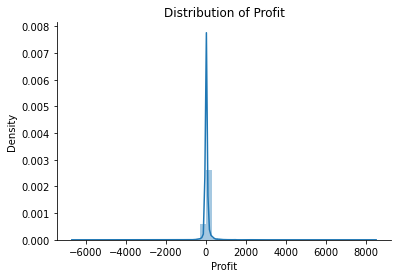

In [24]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

In [25]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


**Outlier / Anomaly Detection vs. Novelty Detection**


The local Outlier Factor (LOF) algorithm can be used for outlier/anomaly detection and novelty detection. The difference between outlier /anomaly detection and novelty detection lies in the training dataset.

Outlier/anomaly detection includes outliers in the training dataset. The algorithm fits the areas with high-density data and ignores the outliers and anomalies.

Novelty detection only includes the normal data points when training the model. Then the model will take a new dataset with outliers/anomalies for prediction. The outliers in novelty detection are also called novelties.

When to use novelty detection vs. outlier detection? That depends on what data is available. If we have the dataset with the outlier labels, we can use either of them. Otherwise, we can only use outlier detection because we cannot get the training dataset with only the normal data.

**Novelty Detection Using Local Outlier Factor (LOF)**

Python's sklearn library has the implementation for Local Outlier Factor (LOF). To use novelty detection, we need to set the hyperparameter novelty as True. fit_predictfit is not available because the algorithm fits and predicts on different datasets. We need to fit the training dataset with all normal data and predict the testing dataset that includes outliers.

In [29]:
df.shape

(9994, 21)

In [67]:
# Train test split
#X=(df['Sales'].values.reshape(-1, 1))
X=df['Sales']
y=df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [69]:
# Keep only the normal data for the training dataset
X_train_normal = X_train[np.where(y_train == 0)]

# Train the local outlier factor (LOF) model for novelty detection
lof_novelty = LocalOutlierFactor(n_neighbors=5, novelty=True).fit(X_train_normal)

# Predict novelties
prediction_novelty = lof_novelty.predict(X_test)

# Change the anomalies' values to make it consistent with the true values
prediction_novelty = [1 if i==-1 else 0 for i in prediction_novelty]

# Check the model performance
print(classification_report(y_test, prediction_novelty))

ValueError: ignored